# EDA

---
The data that we are finding trends on has already been preprocessed and cleaned to a certain degree. Not all nulls were removed and we are only looking at a select amount of features catered to our problem statement.

## Data Dictionary:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Loan ID**|*integer*|Kiva Snapshot|Unique ID for each loan|
|**Status**|*string*|Kiva Snapshot|Loan status indicating whether it has been funded|
|**Posted Time**|*datetime*|Kiva Snapshot|The date/time the loan was posted on Kiva.org|
|**Raised Time**|*datetime*|Kiva Snapshot|The date/time the loan was fully funded|
|**Loan Amount**|*float*|Kiva Snapshot|Total amount of loan, in USD|
|**Activity Name**|*string*|Kiva Snapshot|Name of the activity the loan is for|
|**Sector Name**|*string*|Kiva Snapshot|Name of the sector the loan falls under|
|**Country Name**|*string*|Kiva Snapshot|Country that the borrower lives and will use the loan|
|**Lender Term**|*float*|Kiva Snapshot|Number of installments for loan repayment; (monthly repayments are actually 2 less than the lender term)|
|**Repayment Interval**|*string*|Kiva Snapshot|The frequency that the loan repayments are made|
|**Borrower Genders**|*string*|Kiva Snapshot|Gender of the borrower; any loans with more than one individual have been labeled as Group|
|**Time to Fund**|*timedelta*|Calculated|Total time to fund; calculated from subtracting Posted Time from Raised Time|
|**Hours to Fund**|*integer*|Calculated|Time to fund in hours, rounded up|
|**Loan Year**|*integer*|Calculated|Year the loan was posted|
|**Day Posted**|*string*|Calculated|Day of the week the loan was posted, in UTC/GMT|
|**Image Included**|*integer*|Calculated|Whether or not an image was included in the loan request|
|**Video Included**|*integer*|Calculated|Whether or not a video was included in the loan request|


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# read in cleaned loans data
loans_cleaned = pd.read_csv('../../timmy-data/loans_cleaned.csv')

## Preview

In [8]:
loans_cleaned.head(3)

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
0,1344750,funded,2017-07-22 02:01:05+00:00,2017-08-02 04:07:12+00:00,200.0,Pigs,Agriculture,Philippines,14.0,monthly,F,11 days 02:06:07,267,2017,Saturday,1,0
1,263082,funded,2011-01-05 02:43:16+00:00,2011-01-06 19:55:59+00:00,900.0,Food Production/Sales,Food,El Salvador,26.0,monthly,G,1 days 17:12:43,42,2011,Wednesday,0,0
2,242359,funded,2010-10-25 09:14:01+00:00,2010-10-27 02:01:55+00:00,475.0,General Store,Retail,Philippines,8.0,monthly,F,1 days 16:47:54,41,2010,Monday,1,0


In [9]:
loans_cleaned.columns

Index(['loan_id', 'status', 'posted_time', 'raised_time', 'loan_amount',
       'activity_name', 'sector_name', 'country_name', 'lender_term',
       'repayment_interval', 'borrower_genders', 'time_to_fund',
       'hours_to_fund', 'loan_year', 'day_posted', 'image_incl', 'video_incl'],
      dtype='object')

In [10]:
loans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850453 entries, 0 to 1850452
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loan_id             int64  
 1   status              object 
 2   posted_time         object 
 3   raised_time         object 
 4   loan_amount         float64
 5   activity_name       object 
 6   sector_name         object 
 7   country_name        object 
 8   lender_term         float64
 9   repayment_interval  object 
 10  borrower_genders    object 
 11  time_to_fund        object 
 12  hours_to_fund       int64  
 13  loan_year           int64  
 14  day_posted          object 
 15  image_incl          int64  
 16  video_incl          int64  
dtypes: float64(2), int64(5), object(10)
memory usage: 240.0+ MB


## Are there nulls?

---
We have no nulls thanks to James' preprocessing.

In [11]:
loans_cleaned.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
dtype: int64

# Descriptive Statistics

---
Some starter descriptive stats to get our

In [11]:
loans_cleaned.describe()

,loan_id,loan_amount,lender_term,hours_to_fund,loan_year,image_incl,video_incl
count,1.850453e+06,1.850453e+06,1.850453e+06,1.850453e+06,1.850453e+06,1.850453e+06,1.850453e+06
mean,9.844489e+05,7.899001e+02,1.289791e+01,3.022065e+02,2.014823e+03,9.801886e-01,5.025796e-04
std,5.756594e+05,1.475005e+03,7.185569e+00,3.157173e+02,3.394446e+00,1.393517e-01,2.241266e-02
min,3.080000e+02,2.500000e+01,1.000000e+00,1.000000e+00,2.006000e+03,0.000000e+00,0.000000e+00
25%,4.852760e+05,2.750000e+02,8.000000e+00,8.300000e+01,2.012000e+03,1.000000e+00,0.000000e+00
50%,9.808730e+05,5.000000e+02,1.200000e+01,1.830000e+02,2.015000e+03,1.000000e+00,0.000000e+00
75%,1.478158e+06,9.250000e+02,1.400000e+01,4.530000e+02,2.018000e+03,1.000000e+00,0.000000e+00
max,1.999358e+06,5.000000e+05,1.560000e+02,1.280300e+04,2.020000e+03,1.000000e+00,1.000000e+00


We find descriptive statistics, grouped by `country_name`, on the `loan_amount`. We will show the total sum, the average loan amounts, total loan counts requested, and the min and max.

### ...by country

In [12]:
country_stats_loan = loans_cleaned.groupby(['country_name']).agg({'loan_amount': ['sum','mean', 'count', 'min', 'max']})
country_stats_loan

loan_amount                       \
                                              sum         mean   count   
country_name                                                             
Afghanistan                             1899250.0   838.891343    2264   
Albania                                 5914550.0  1408.226190    4200   
Armenia                                20722925.0  1551.814063   13354   
Azerbaijan                             13150000.0  1418.401467    9271   
Belize                                   148850.0   695.560748     214   
Benin                                   3819850.0   651.962792    5859   
Bolivia                                46985825.0  1822.498158   25781   
Bosnia and Herzegovina                   441325.0   766.189236     576   
Brazil                                  3644950.0  2323.103888    1569   
Bulgaria                                 372450.0  1275.513699     292   
Burkina Faso                            7114975.0   990.943593    7180   
Burundi                                 4919375.0  2988.684690    1646   
Cambodia                               59570650.0   620.948038   95935   
Cameroon                                2648275.0   445.163053    5949   
Chile                                   2528975.0  2860.831448     884   
China                                    372525.0  2800.939850     133   
Colombia                               28525850.0   592.055997   48181   
Congo                                   2252550.0  2381.131078     946   
Costa Rica                              7214350.0  1186.570724    6080   
Cote D'Ivoire                            312000.0  1248.000000     250   
Dominican Republic                     10105175.0  1910.241021    5290   
Ecuador                                54005175.0  1095.084253   49316   
Egypt                                   3126525.0   647.313665    4830   
El Salvador                            45896750.0   612.471142   74937   
Fiji                                    1974125.0   777.827029    2538   
Georgia                                10584200.0  1280.295149    8267   
Ghana                                  18784275.0   714.611390   26286   
Guatemala                              26122100.0  1610.189238   16223   
Haiti                                   6210300.0   831.254183    7471   
Honduras                               15473525.0   774.993739   19966   
India                                  12551450.0   492.735445   25473   
Indonesia                               9712100.0   715.809257   13568   
Iraq                                    8076675.0  2512.966708    3214   
Israel                                  2274250.0  3874.361158     587   
Jordan                                 13497000.0  1064.348238   12681   
Kenya                                  88660725.0   439.134047  201899   
Kosovo                                  3206925.0  1339.567669    2394   
Kyrgyzstan                             19931675.0  1295.947659   15380   
Lao People's Democratic Republic        1337325.0   687.217369    1946   
Lebanon                                36452700.0  1290.543794   28246   
Lesotho                                  944300.0   444.795101    2123   
Liberia                                 6247650.0   325.534077   19192   
Madagascar                              3788450.0   272.864448   13884   
Malawi                                  4436075.0  1524.424399    2910   
Mali                                   16466675.0  1205.025613   13665   
Mexico                                 26408150.0  1211.494174   21798   
Moldova                                 2839850.0  1665.601173    1705   
Mongolia                               14133075.0  1536.537834    9198   
Mozambique                              5303525.0   589.477048    8997   
Myanmar (Burma)                         4671450.0  1427.704768    3272   
Namibia                                  177825.0  5388.636364      33   
Nepal                                   10

In [13]:
country_stats_hr = loans_cleaned.groupby(['country_name']).agg({'hours_to_fund': ['sum','mean', 'count', 'min', 'max']})
country_stats_hr

hours_to_fund                          \
                                               sum        mean   count min   
country_name                                                                 
Afghanistan                                 436429  192.768993    2264   2   
Albania                                    1587739  378.033095    4200   2   
Armenia                                    6570110  491.995657   13354   2   
Azerbaijan                                 4918140  530.486463    9271   3   
Belize                                       20707   96.761682     214   1   
Benin                                      1370949  233.990271    5859   1   
Bolivia                                   10800511  418.932974   25781   1   
Bosnia and Herzegovina                       45978   79.822917     576   3   
Brazil                                      545770  347.845762    1569   2   
Bulgaria                                     96998  332.184932     292  13   
Burkina Faso                               1668636  232.400557    7180   2   
Burundi                                     599736  364.359660    1646   4   
Cambodia                                  23270374  242.563965   95935   1   
Cameroon                                   1713413  288.016978    5949   1   
Chile                                       122260  138.303167     884   1   
China                                        23459  176.383459     133  11   
Colombia                                  22375653  464.408231   48181   1   
Congo                                       184585  195.121564     946   2   
Costa Rica                                 2008759  330.387993    6080   2   
Cote D'Ivoire                                21838   87.352000     250   4   
Dominican Republic                         1367765  258.556711    5290   1   
Ecuador                                   13808913  280.008780   49316   1   
Egypt                                      1378581  285.420497    4830   2   
El Salvador                               33130249  442.108024   74937   1   
Fiji                                        866817  341.535461    2538   1   
Georgia                                    2909072  351.889682    8267   1   
Ghana                                      4835461  183.955756   26286   1   
Guatemala                                  5343149  329.356408   16223   1   
Haiti                                      1886875  252.559898    7471   1   
Honduras                                   7264358  363.836422   19966   1   
India                                      5871977  230.517685   25473   1   
Indonesia                                  2802236  206.532724   13568   1   
Iraq                                       1391058  432.812072    3214   2   
Israel                                      132476  225.683135     587   5   
Jordan                                     5065072  399.422128   12681   2   
Kenya                                     72189012  357.550122  201899   1   
Kosovo                                      993058  414.811195    2394   4   
Kyrgyzstan                                 6863502  446.261508   15380   2   
Lao People's Democratic Republic            274982  141.306269    1946   2   
Lebanon                                   10904048  386.038660   28246   2   
Lesotho                                     187714   88.419218    2123   1   
Liberia                                    2662079  138.707743   19192   1   
Madagascar                                 3235681  233.051066   13884   1   
Malawi                                      483702  166.220619    2910   1   
Mali                                       4967711  363.535382   13665   1   
Mexico                                     5468827  250.886641   21798   1   
Moldova                                     515175  302.155425    1705   1   
Mongolia                                   2342359  254.659600    9198   1   
Mozambique                                 3205897  356.329

### ...by year

In [14]:
year_stats_loan = loans_cleaned.groupby(['loan_year']).agg({'loan_amount': ['sum','mean', 'count', 'min', 'max']})
year_stats_loan

loan_amount                                    
                   sum        mean   count   min       max
loan_year                                                 
2006         1806150.0  675.448766    2674  50.0    2000.0
2007        16544400.0  635.467640   26035  25.0    5000.0
2008        36494175.0  724.953814   50340  25.0    5000.0
2009        57295025.0  709.702902   80731  25.0   10000.0
2010        70378675.0  771.890663   91177  25.0   10000.0
2011        91865950.0  819.076214  112158  25.0   10000.0
2012       108921600.0  859.945840  126661  25.0   49525.0
2013       123455225.0  910.409907  135604  25.0   50000.0
2014       138510400.0  843.675346  164175  25.0  100000.0
2015       138033325.0  821.803035  167964  25.0   50000.0
2016       142556425.0  781.979490  182302  25.0   50000.0
2017       160574775.0  745.230310  215470  25.0  100000.0
2018       158196200.0  744.869833  212381  25.0  100000.0
2019       148526300.0  733.586380  202466  25.0  100000.0
2020        68514350.0  853.070410   80315  25.0  500000.0

In [15]:
year_stats_hr = loans_cleaned.groupby(['loan_year']).agg({'hours_to_fund': ['sum','mean', 'count', 'min', 'max']})
year_stats_hr

hours_to_fund                               
                    sum        mean   count min    max
loan_year                                             
2006             483219  180.710172    2674   1   2028
2007            4703916  180.676628   26035   1   4084
2008           15680359  311.489054   50340   1   4239
2009           13261992  164.273848   80731   1   2142
2010           15688615  172.067682   91177   1   1639
2011           29474893  262.797955  112158   1   1980
2012           39508252  311.921207  126661   1   7454
2013           38842828  286.443084  135604   1  12803
2014           63436478  386.395480  164175   1  10087
2015           63031430  375.267498  167964   1   9276
2016           61928322  339.701824  182302   1   9377
2017           66622084  309.194245  215470   1   5627
2018           58301169  274.512169  212381   1   3267
2019           63541826  313.839489  202466   1   3852
2020           24713574  307.708074   80315   1   2501

# Loan Amount EDA

---
We can use this data to filter out any substantial loan amounts above the upperbound mark. We would consider these loans as outliers.

-700.0 1900.0


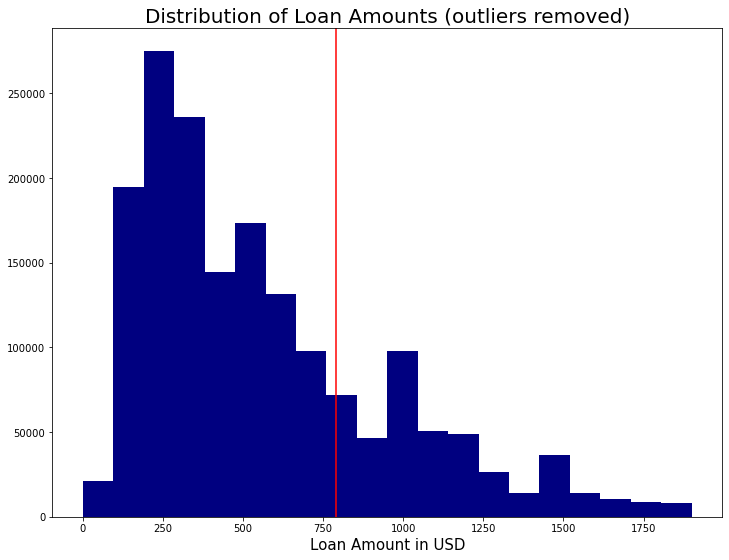

In [68]:
q1, q3= np.percentile(loans_cleaned['loan_amount'],[25,75])
iqr = q3-q1
# Calculate bounds 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound, upper_bound)

plt.figure(figsize=(12,9))
plt.hist(loans_cleaned['loan_amount'],
         bins = 20,
         color='navy',
         range=(0, upper_bound))
plt.title('Distribution of Loan Amounts (outliers removed)', size=20)
plt.xlabel('Loan Amount in USD', size=15)
plt.axvline(x=loans_cleaned['loan_amount'].mean(),color='red');

# plt.savefig('../Images/loan_amt_eda.png')

# Hours To Fund EDA

---
Most of the loan fund times fall under the mean of about 300 hours. 

This can also help in selecting which rows of data to run our model on. Seeing as we also have outliers in the our target variable this could also help in reduce the amound of error.

-472.0 1008.0


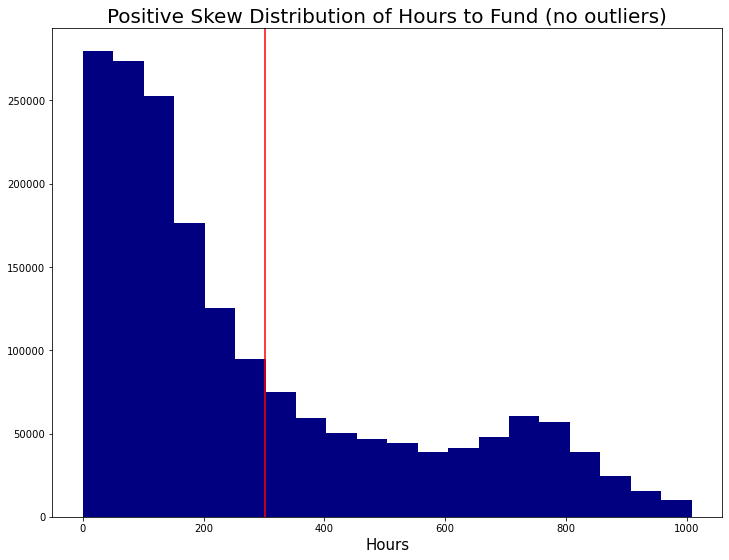

In [70]:
q1, q3= np.percentile(loans_cleaned['hours_to_fund'],[25,75])
iqr = q3-q1
# Calculate bounds 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound, upper_bound)

plt.figure(figsize=(12,9))
plt.hist(loans_cleaned['hours_to_fund'],
         bins = 20,
         color='navy',
         range=(0, upper_bound))
plt.title('Positive Skew Distribution of Hours to Fund (no outliers)', size=20)
plt.xlabel('Hours', size=15)
plt.axvline(x=loans_cleaned['hours_to_fund'].mean(),color='red');

# plt.savefig('../Images/hrs_2_fund_eda.png')

# Lender Term EDA

---
Lots of lender terms fall into 14, 8, 7, or 11 months.

In [38]:
loans_cleaned['lender_term'].value_counts().head(10)

14.0    465967
8.0     372638
7.0     111413
11.0    110671
6.0      95666
13.0     86009
12.0     83564
15.0     81701
20.0     75196
10.0     67064
Name: lender_term, dtype: int64

-1.0 23.0


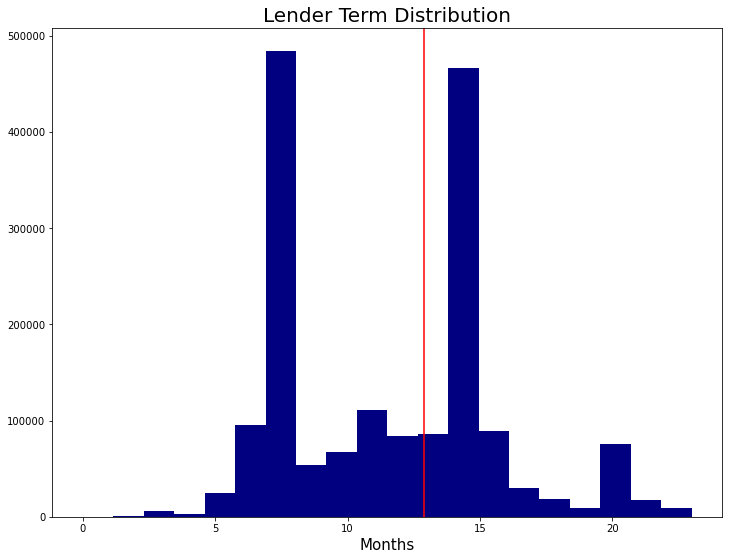

In [71]:
q1, q3= np.percentile(loans_cleaned['lender_term'],[25,75])
iqr = q3-q1
# Calculate bounds 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound, upper_bound)

plt.figure(figsize=(12,9))
plt.hist(loans_cleaned['lender_term'],
         bins = 20,
         color='navy',
         range=(0, upper_bound))
plt.title('Lender Term Distribution', size=20)
plt.xlabel('Months', size=15)
plt.axvline(x=loans_cleaned['lender_term'].mean(),color='red');

# plt.savefig('../Images/lender_term_eda.png')

# Top 10s

---
Let's look at some top 10s in the `'activity_name','sector_name','country_name','repayment_interval','borrower_genders'`.

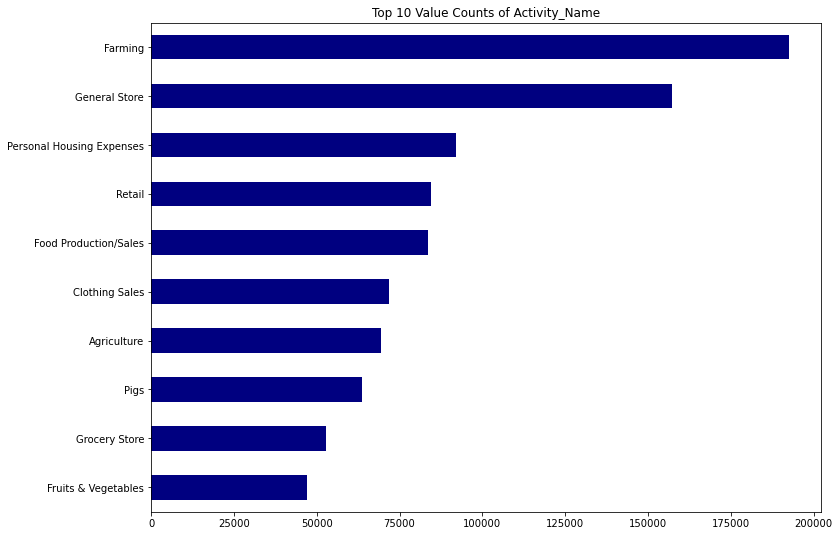

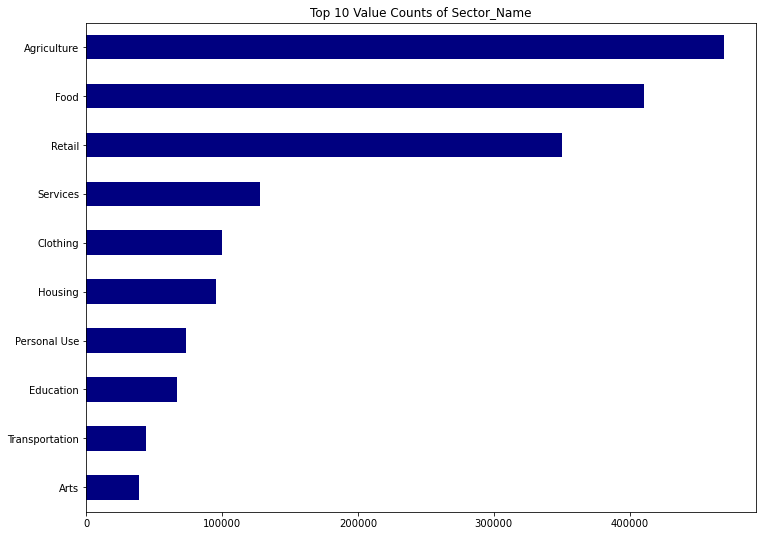

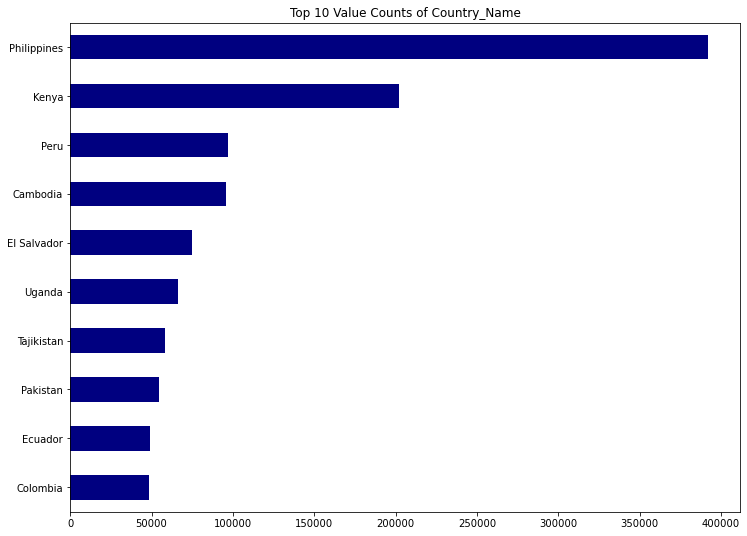

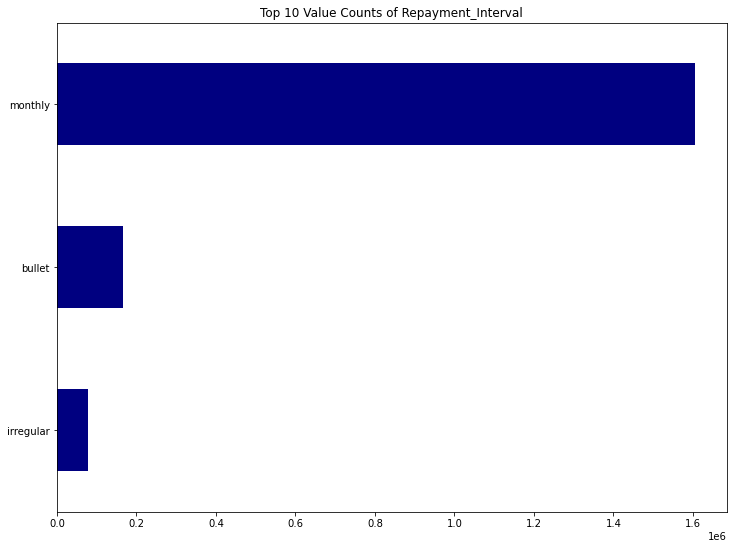

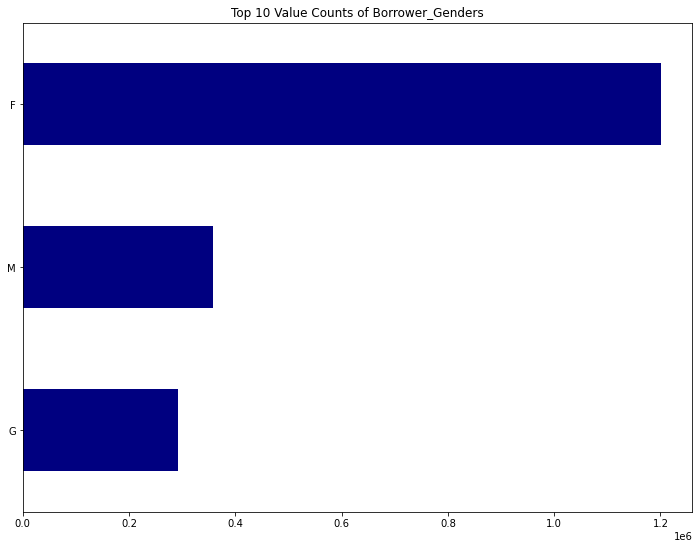

In [73]:
clean_cols = ['activity_name','sector_name','country_name','repayment_interval','borrower_genders']
for name in clean_cols:
    plt.figure(figsize=(12, 9))
    loans_cleaned[name].value_counts().sort_values().tail(10).plot(kind='barh', color='navy')
    plt.title(f'Top 10 Value Counts of {name.title()}')
    plt.savefig(f'../Images/{name}_top10s.png')
    plt.show()
    
    

Over the years, the success of Kiva getting loans for people in other parts of the world has increased. In 2006, they started with only 2674 successfully funded loans and by 2017, ended the year with over 200,000.

# Year by Year EDA

---
Since success increased over time, let's look at the descriptive statistics over time as well.

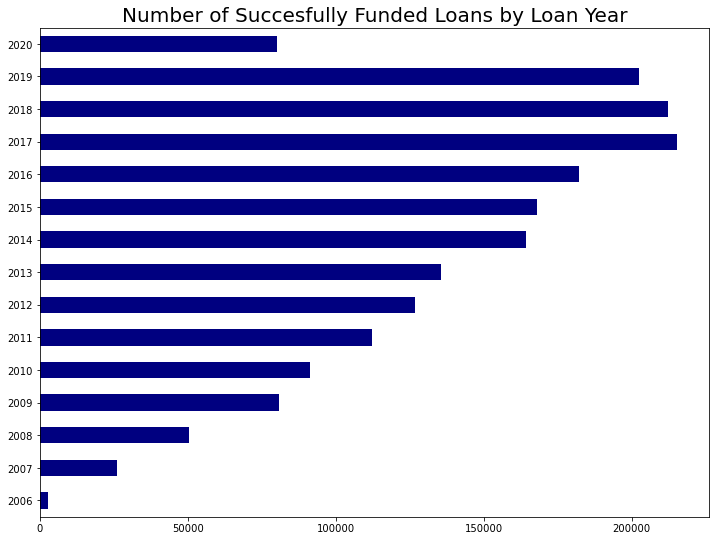

In [74]:
plt.figure(figsize=(12,9))
loans_cleaned['loan_year'].value_counts(sort=False).plot(kind='barh', color='navy')
plt.title('Number of Succesfully Funded Loans by Loan Year', size=20);

# plt.savefig('../Images/yearbyyear_tot_amt_loans.png')

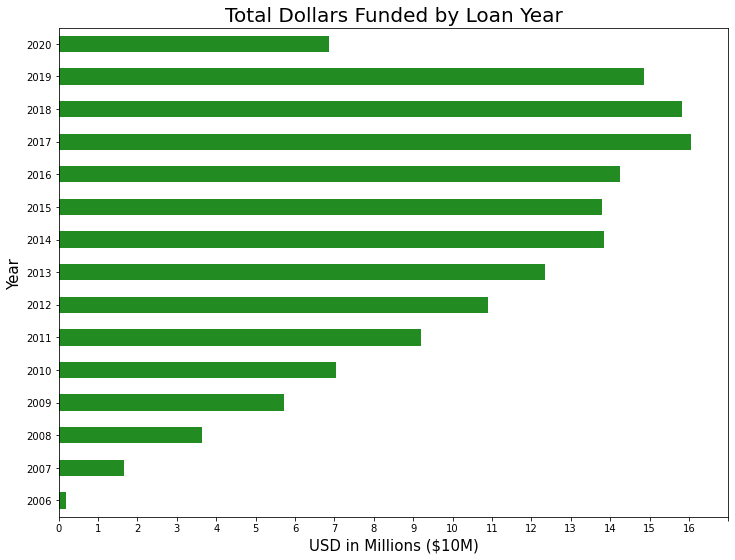

In [75]:
plt.figure(figsize=(12,9))
loans_cleaned[['loan_year','loan_amount']].groupby('loan_year')['loan_amount'].sum().plot(kind='barh', color='forestgreen')
plt.title('Total Dollars Funded by Loan Year', size=20)
plt.ylabel('Year', size=15)
plt.xticks(ticks=range(0, 180_000_000, 10_000_000),labels=range(0,17)) # Thanks Hilary for the save
plt.xlabel('USD in Millions ($10M)',size=15);

# plt.savefig('../Images/yearbyyear_tot_usd_loans.png')

In [13]:
loans_cleaned.groupby('loan_year')[['loan_amount','lender_term','hours_to_fund']].mean()

,loan_amount,lender_term,hours_to_fund
loan_year,,,
2006,675.448766,11.540389,180.710172
2007,635.467640,12.707087,180.676628
2008,724.953814,12.014879,311.489054
2009,709.702902,11.089718,164.273848
2010,771.890663,11.485199,172.067682
2011,819.076214,11.843685,262.797955
2012,859.945840,12.404505,311.921207
2013,910.409907,13.462486,286.443084
2014,843.675346,14.077624,386.395480


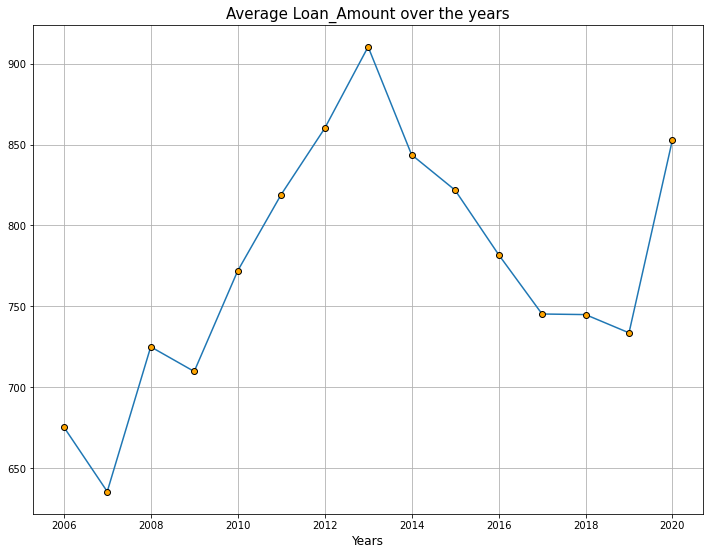

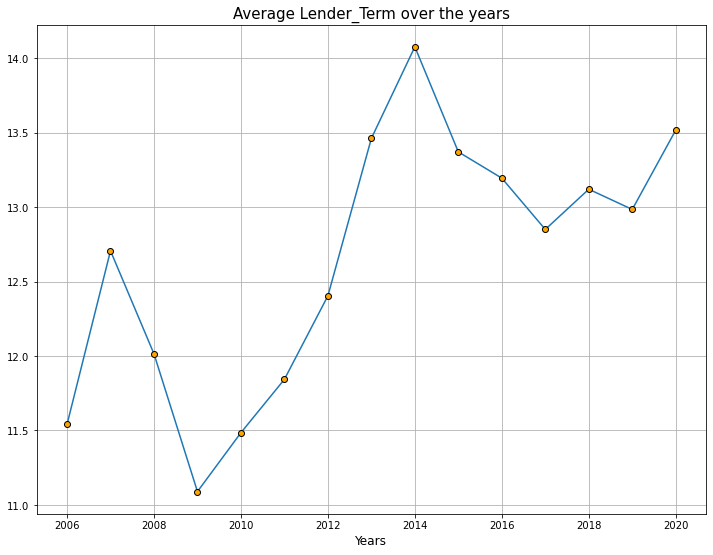

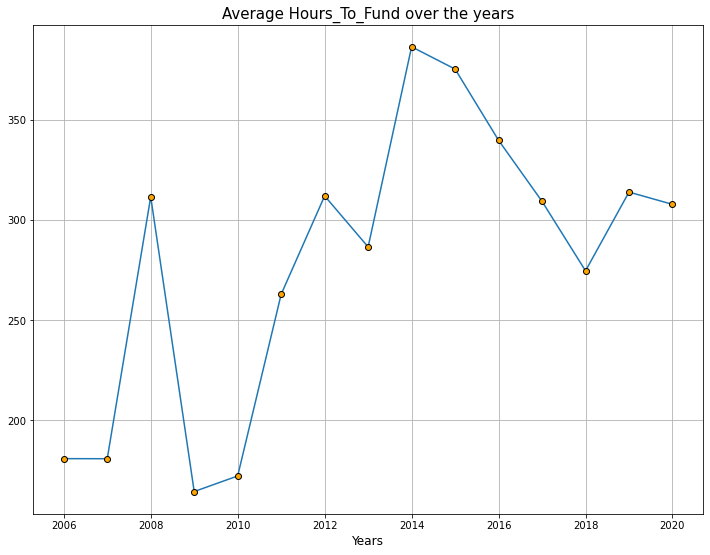

In [77]:
three_cols = ['loan_amount','lender_term','hours_to_fund']

for name in three_cols:
    plt.figure(figsize=(12,9))
    loans_cleaned.groupby('loan_year')[name].mean().plot(kind='line', marker='o',markerfacecolor='orange',markeredgecolor='black')
    plt.title(f'Average {name.title()} over the years',size=15)
    plt.xlabel('Years',size=12)
    plt.grid();
    
#     plt.savefig(f'../Images/{name}_avgs_byyear.png')

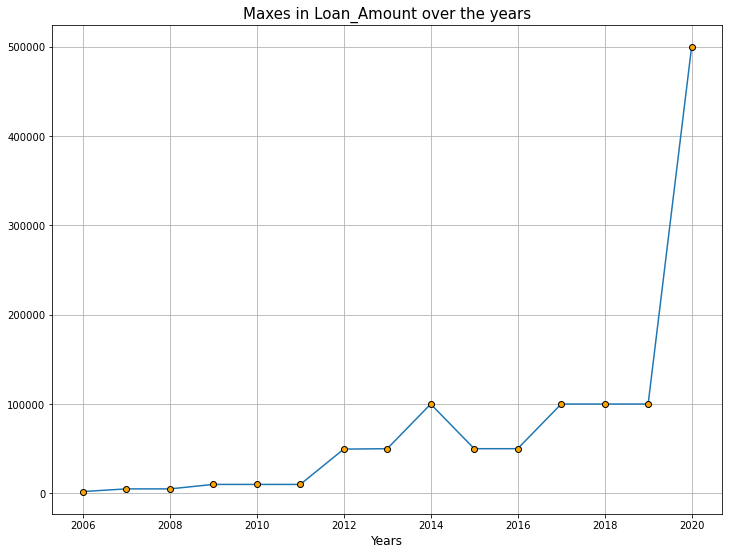

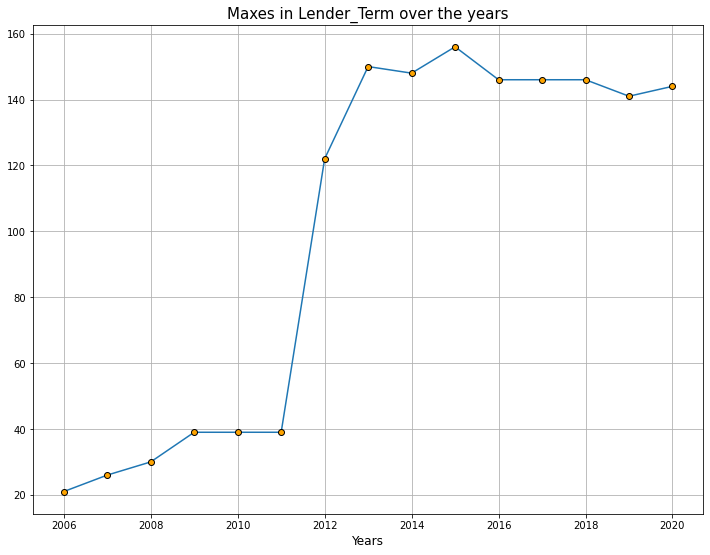

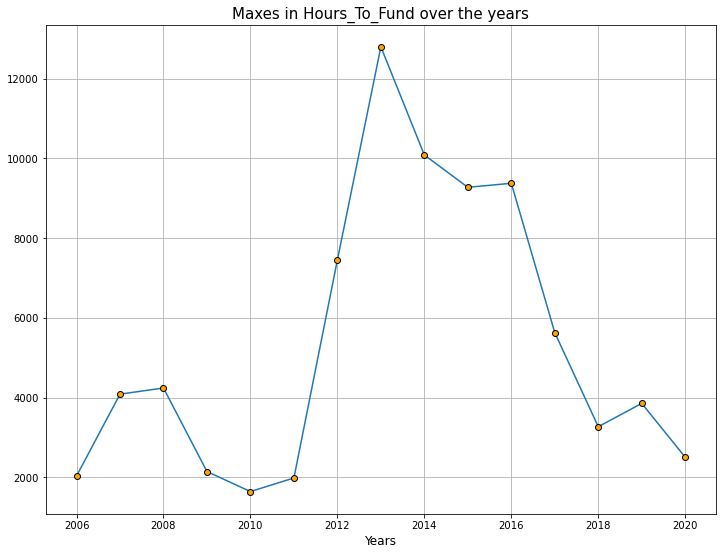

In [78]:
for name in three_cols:
    plt.figure(figsize=(12,9))
    loans_cleaned.groupby('loan_year')[name].max().plot(kind='line', marker='o',markerfacecolor='orange',markeredgecolor='black')
    plt.title(f'Maxes in {name.title()} over the years',size=15)
    plt.xlabel('Years',size=12)
    plt.grid();
    
#     plt.savefig(f'../Images/{name}_maxes_byyear.png')

# Country Name EDA

--- 
With 88 countries working through the Kiva program for loans, there must be some unique trends for each country.

In [16]:
len(loans_cleaned['country_name'].unique())

88

Created a new dataframe where it was grouped by country and loan year then looked at specific columns 

```python
three_cols = ['loan_amount','lender_term','hours_to_fund']
```

In [62]:
three_cols = ['loan_amount','lender_term','hours_to_fund']

In [63]:
countries = loans_cleaned['country_name'].unique()

These are the top sectors for each country.

In [64]:
top_sectors = pd.DataFrame(columns=['country','top_sector','count'], 
                           index=range(len(countries)))

for i in range(len(countries)):
    top_sectors.loc[i].country = countries[i].title()
    top_sectors.loc[i].top_sector = loans_cleaned.groupby(['country_name'])['sector_name'].value_counts()[countries[i]].index[0]
    top_sectors.loc[i]['count'] = loans_cleaned.groupby(['country_name'])['sector_name'].value_counts()[countries[i]].max()
    

In [65]:
top_sectors.head(10)

,country,top_sector,count
0,Philippines,Retail,122113
1,El Salvador,Agriculture,26522
2,Liberia,Food,10119
3,Cameroon,Food,1788
4,Paraguay,Food,7843
5,Lebanon,Education,7262
6,Colombia,Food,11051
7,Cambodia,Personal Use,33979
8,Haiti,Food,2999
9,Mongolia,Food,1655


These are the main activities for each country.

In [66]:
top_activites = pd.DataFrame(columns=['country','top_activity','count'], 
                           index=range(len(countries)))

for i in range(len(countries)):
    top_activites.loc[i].country = countries[i].title()
    top_activites.loc[i].top_activity = loans_cleaned.groupby(['country_name'])['activity_name'].value_counts()[countries[i]].index[0]
    top_activites.loc[i]['count'] = loans_cleaned.groupby(['country_name'])['activity_name'].value_counts()[countries[i]].max()
    

In [67]:
top_activites.head(10)

,country,top_activity,count
0,Philippines,General Store,96886
1,El Salvador,Food Production/Sales,10003
2,Liberia,Food Market,5831
3,Cameroon,Agriculture,705
4,Paraguay,Higher education costs,5832
5,Lebanon,Primary/secondary school costs,5380
6,Colombia,Retail,4890
7,Cambodia,Home Appliances,29074
8,Haiti,Retail,953
9,Mongolia,Personal Housing Expenses,1265


# Females know how to earn money for the right causes

---

In [47]:
loans_cleaned['borrower_genders'].value_counts(normalize=True)

F    0.648584
M    0.193202
G    0.158213
Name: borrower_genders, dtype: float64

Females has a 45% gap from males and group borrowers. Let's look at only females and what is the most common activity and which country they hail from.

In [80]:
F_only = loans_cleaned[loans_cleaned['borrower_genders']=='F']

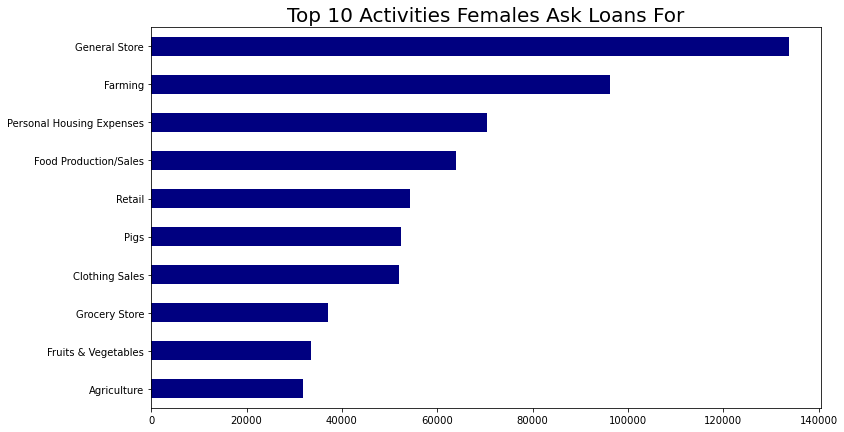

In [81]:
plt.figure(figsize=(12,7))
F_only['activity_name'].value_counts().sort_values().tail(10).plot(kind='barh', color='navy')
plt.title('Top 10 Activities Females Ask Loans For', size=20);

# plt.savefig('../Images/topfemaleactivities.png')

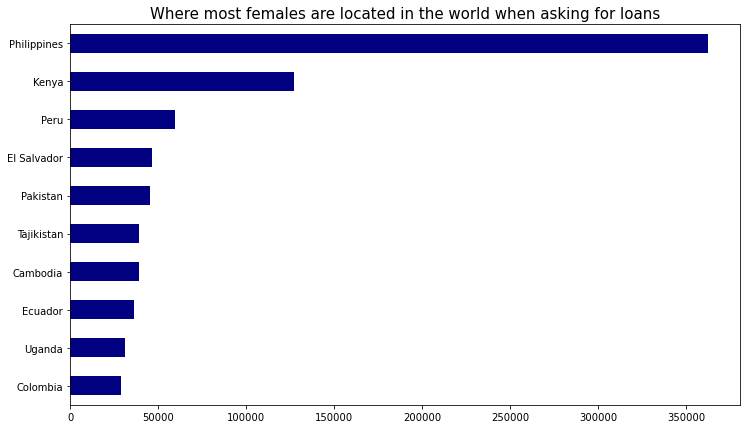

In [82]:
plt.figure(figsize=(12,7))
F_only['country_name'].value_counts().sort_values().tail(10).plot(kind='barh', color='navy')
plt.title('Where most females are located in the world when asking for loans', size=15);

# plt.savefig('../Images/females_country.png')

## It's more fun in the Philippines.

---
The Philippines is the country that asks the most loans, regardless if we are looking at feamles only or the entire dataset. Why is that? I feel that it might have something to do with the value they are asking.


In [84]:
philippines = loans_cleaned[loans_cleaned['country_name']=='Philippines']

In [25]:
philippines.head()

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
0,1344750,funded,2017-07-22 02:01:05+00:00,2017-08-02 04:07:12+00:00,200.0,Pigs,Agriculture,Philippines,14.0,monthly,F,11 days 02:06:07,267,2017,Saturday,1,0
2,242359,funded,2010-10-25 09:14:01+00:00,2010-10-27 02:01:55+00:00,475.0,General Store,Retail,Philippines,8.0,monthly,F,1 days 16:47:54,41,2010,Monday,1,0
3,1818722,funded,2019-08-19 06:33:01+00:00,2019-08-21 14:50:42+00:00,350.0,Food Production/Sales,Food,Philippines,8.0,monthly,F,2 days 08:17:41,57,2019,Monday,1,0
10,1537750,funded,2018-05-25 13:15:29+00:00,2018-05-31 06:35:39+00:00,400.0,General Store,Retail,Philippines,8.0,monthly,F,5 days 17:20:10,138,2018,Friday,1,0
12,736981,funded,2014-07-10 09:07:20+00:00,2014-07-17 18:24:29+00:00,225.0,Personal Housing Expenses,Housing,Philippines,60.0,monthly,F,7 days 09:17:09,178,2014,Thursday,1,0


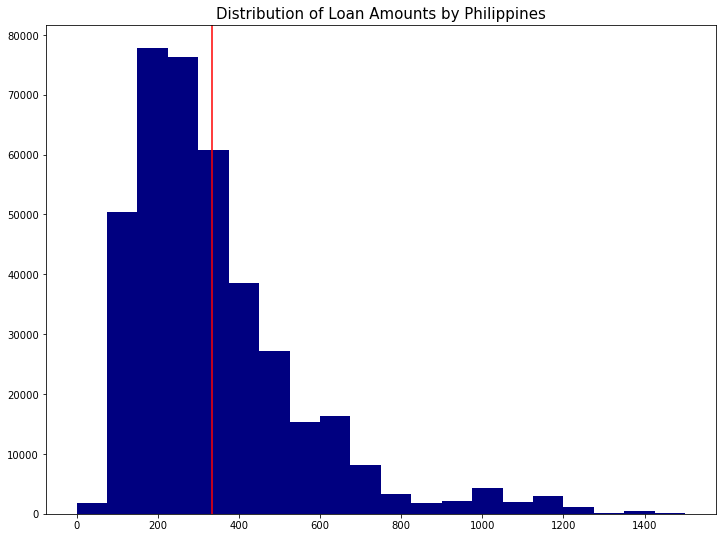

In [85]:
plt.figure(figsize=(12,9))
plt.hist(philippines['loan_amount'],
         bins=20,
         range=(0,1500),
         color='navy')
plt.title('Distribution of Loan Amounts by Philippines',size=15)
plt.axvline(x=philippines['loan_amount'].mean(),color='red');

# plt.savefig('../Images/dist_philippines_loan_amts.png')

They ask for a lot of small loan counts around the $200. Let's compare their values with the other countries.

---
Looking at the possible reasons for why their amount of successes is 10% higher than the next country, Kenya, is probably due to the fact that their average amount of money they ask for is one of the lowest. In fact the average of loan amounts is less than $500.

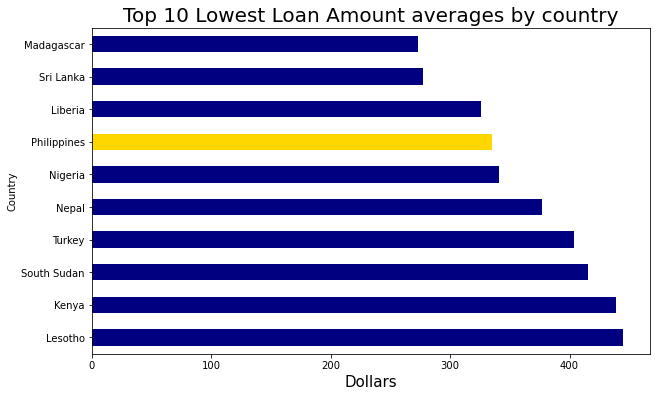

In [86]:
plt.figure(figsize=(10,6))
loans_cleaned.groupby('country_name')['loan_amount'].mean().sort_values(ascending=False).tail(10).plot(kind='barh', 
                                color=['navy','navy','navy','navy','navy','navy','gold'])
plt.title('Top 10 Lowest Loan Amount averages by country',size=20)
plt.xlabel('Dollars',size=15)
plt.ylabel('Country');

# plt.savefig('../Images/top10_lowest_loanamt_avgs.png')

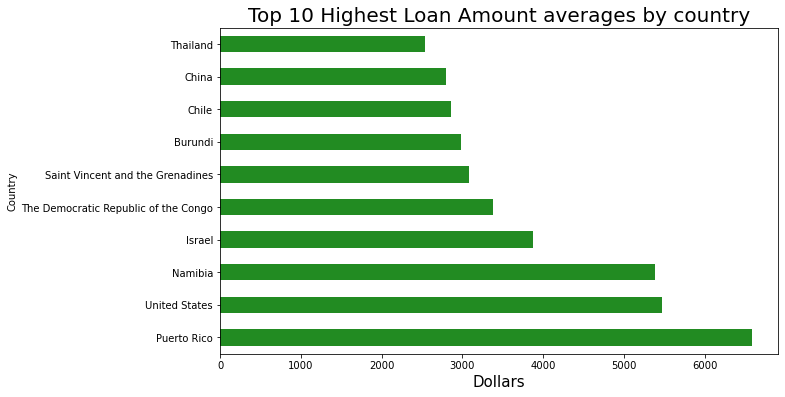

In [87]:
plt.figure(figsize=(10,6))
loans_cleaned.groupby('country_name')['loan_amount'].mean().sort_values(ascending=False).head(10).plot(kind='barh',color='forestgreen')
plt.title('Top 10 Highest Loan Amount averages by country',size=20)
plt.xlabel('Dollars',size=15)
plt.ylabel('Country');

# plt.savefig('../Images/top10_highest_loanamt_avgs.png')

## Days of the week

---
Let's look at some trends regarding the days of the week in which a loan was posted and ready for taking in funds.

In [88]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
posts_by_day = pd.DataFrame(loans_cleaned['day_posted'].value_counts())
posts_by_day.reset_index(inplace=True)
posts_by_day.rename(columns={'index':'day',
                             'day_posted':'total'},inplace=True)
posts_by_day = posts_by_day.set_index('day').reindex(cats).reset_index()

In [67]:
posts_by_day

,day,total
0,Sunday,46548
1,Monday,333745
2,Tuesday,354376
3,Wednesday,352111
4,Thursday,355393
5,Friday,331375
6,Saturday,76905


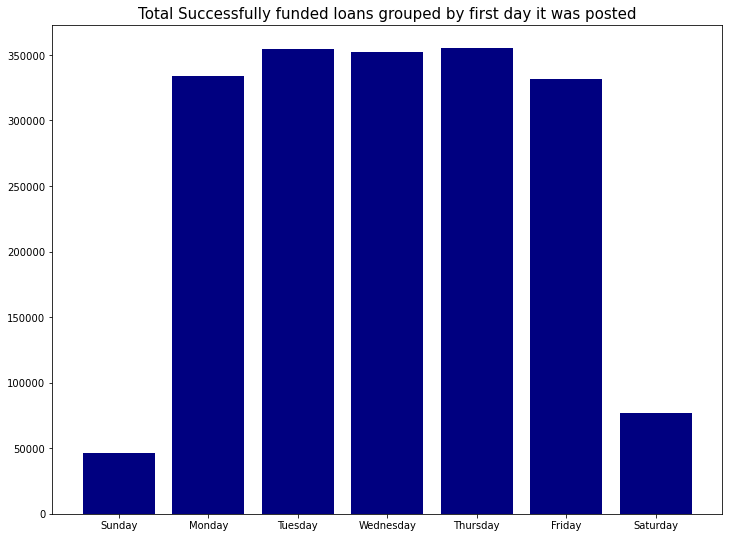

In [89]:
plt.figure(figsize=(12,9))
plt.bar(cats, posts_by_day['total'], color='navy')
plt.title('Total Successfully funded loans grouped by first day it was posted',size=15);

# plt.savefig('../Images/num_loans_by_day.png')

The reason why there are Sunday and Saturday loans is probably due to the many headquarters around the world. Since it is on GMT time, then it is possible that if it is Saturday in one part of the world it is still Friday in another. That is when the loan is posted.

# Insights

---
We will use these to filter our data to better reduce error from our models.

# Time To Fund

In [33]:
loans_cleaned.sort_values('loan_amount',ascending=False).head(15)

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
379118,1965868,funded,2020-05-21 00:25:15+00:00,2020-06-28 13:04:13+00:00,500000.0,Services,Services,Senegal,25.0,irregular,F,38 days 12:38:58,925,2020,Thursday,1,0
1778265,1966161,funded,2020-05-22 01:45:57+00:00,2020-07-01 08:22:58+00:00,500000.0,Services,Services,Ecuador,25.0,irregular,F,40 days 06:37:01,967,2020,Friday,1,0
1602465,1963320,funded,2020-05-01 00:14:58+00:00,2020-06-11 19:29:51+00:00,499975.0,Services,Services,Uganda,26.0,irregular,M,41 days 19:14:53,1004,2020,Friday,1,0
1130796,1966153,funded,2020-05-22 00:30:47+00:00,2020-07-06 00:52:02+00:00,424100.0,Services,Services,Honduras,24.0,irregular,F,45 days 00:21:15,1081,2020,Friday,1,0
714898,1968705,funded,2020-06-03 01:29:06+00:00,2020-07-18 02:02:02+00:00,417775.0,Services,Services,Nicaragua,16.0,irregular,F,45 days 00:32:56,1081,2020,Wednesday,1,0
1023333,1973944,funded,2020-06-18 14:47:16+00:00,2020-08-02 20:52:01+00:00,408375.0,Services,Services,Rwanda,26.0,irregular,F,45 days 06:04:45,1087,2020,Thursday,1,0
1501474,1973446,funded,2020-06-17 20:15:14+00:00,2020-08-01 20:50:02+00:00,355225.0,Services,Services,Paraguay,25.0,irregular,F,45 days 00:34:48,1081,2020,Wednesday,1,0
846071,1976111,funded,2020-06-23 18:27:22+00:00,2020-07-23 08:11:11+00:00,200000.0,Renewable Energy Products,Retail,Kenya,26.0,irregular,M,29 days 13:43:49,710,2020,Tuesday,1,0
1146548,1967717,funded,2020-05-29 18:57:37+00:00,2020-07-08 02:06:38+00:00,200000.0,Agriculture,Agriculture,Peru,25.0,irregular,M,39 days 07:09:01,944,2020,Friday,1,0
828639,1966124,funded,2020-05-21 21:02:43+00:00,2020-06-29 01:13:50+00:00,200000.0,Agriculture,Agriculture,Ghana,25.0,irregular,M,38 days 04:11:07,917,2020,Thursday,1,0


In [34]:
loans_cleaned.sort_values('hours_to_fund',ascending=False).head(15)

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
857780,1078831,funded,2013-04-04 16:06:32+00:00,2014-09-20 02:28:32+00:00,250.0,Clothing,Clothing,Kenya,6.0,monthly,F,533 days 10:22:00,12803,2013,Thursday,1,0
1208037,1080019,funded,2013-12-08 16:19:12+00:00,2015-05-20 18:11:28+00:00,225.0,General Store,Retail,Kenya,6.0,monthly,F,528 days 01:52:16,12674,2013,Sunday,1,0
1141044,1080950,funded,2014-04-08 21:15:38+00:00,2015-06-03 04:01:08+00:00,125.0,Services,Services,Kenya,6.0,monthly,F,420 days 06:45:30,10087,2014,Tuesday,1,0
1709338,1078531,funded,2013-01-29 23:55:16+00:00,2014-03-07 12:07:43+00:00,3000.0,Services,Services,United States,25.0,monthly,M,401 days 12:12:27,9637,2013,Tuesday,1,0
714132,1086465,funded,2014-12-09 06:31:33+00:00,2016-01-13 06:04:46+00:00,5000.0,Landscaping / Gardening,Services,United States,24.0,monthly,M,399 days 23:33:13,9600,2014,Tuesday,1,0
768512,1269631,funded,2016-04-13 00:03:17+00:00,2017-05-08 16:55:31+00:00,2500.0,Clothing,Clothing,United States,24.0,monthly,F,390 days 16:52:14,9377,2016,Wednesday,1,0
1303565,1171586,funded,2015-10-31 00:52:14+00:00,2016-11-20 12:41:06+00:00,5000.0,Services,Services,United States,24.0,monthly,M,386 days 11:48:52,9276,2015,Saturday,1,0
1178014,1082720,funded,2014-08-21 21:42:45+00:00,2015-07-24 09:10:36+00:00,125.0,Cosmetics Sales,Retail,Kenya,3.0,monthly,F,336 days 11:27:51,8076,2014,Thursday,1,0
289832,1080590,funded,2014-02-26 15:14:14+00:00,2015-01-27 18:28:00+00:00,125.0,Grocery Store,Food,Kenya,3.0,monthly,F,335 days 03:13:46,8044,2014,Wednesday,1,0
1492552,1082718,funded,2014-08-21 21:31:39+00:00,2015-07-21 12:29:41+00:00,125.0,Cosmetics Sales,Retail,Kenya,3.0,monthly,F,333 days 14:58:02,8007,2014,Thursday,1,0


The United States has the longest average of hours to fund. This might be because they are in the top in amount asked.

Looking at this proves that there is an inverse relationship between hours to fund and loan amount requested.

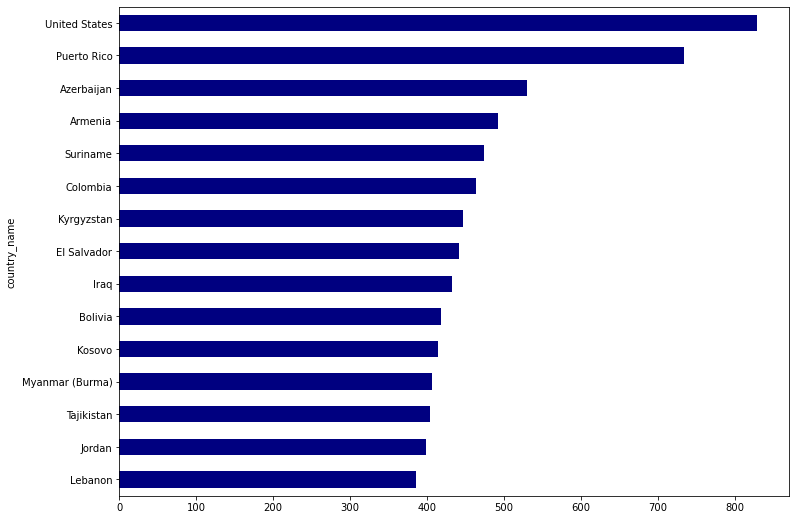

In [70]:
plt.figure(figsize=(12,9))
loans_cleaned.groupby('country_name')['hours_to_fund'].mean().sort_values().tail(15).plot(kind='barh',color='navy');

# Correlations

---

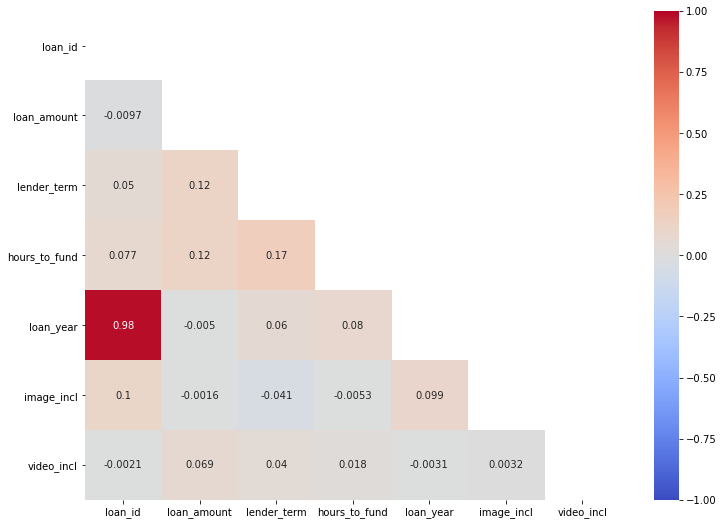

In [90]:
mask = np.triu(np.ones_like(loans_cleaned.corr(), dtype=np.bool))

plt.figure(figsize=(12,9))
sns.heatmap(loans_cleaned.corr(),
            cmap='coolwarm',
            vmin=-1,
            vmax=1, annot=True, mask=mask);

# plt.savefig('../Images/correlation_heatmap.png')

There might not be a large correlation for hours to fund utilizing these numeric features. There must be more weight, or feature importance, on the object dtype features. 

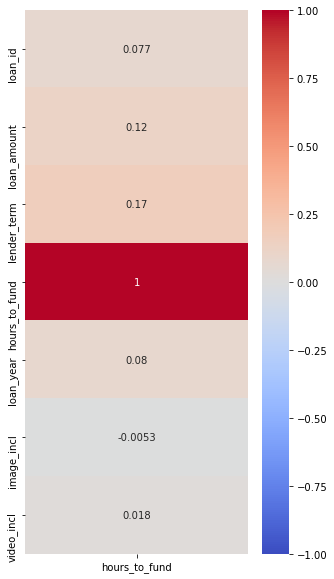

In [10]:
plt.figure(figsize=(5,10))
sns.heatmap(loans_cleaned.corr()[['hours_to_fund']],
            annot=True,
            vmin=-1, vmax=1,
            cmap='coolwarm');

plt.savefig('../Images/heatmap_hrs_2_fund.png')

There's not much of a noticeable trend.

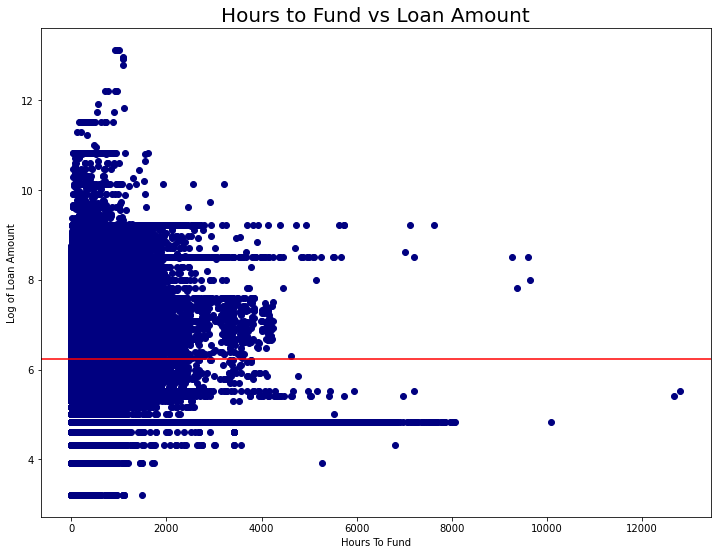

In [100]:
plt.figure(figsize=(12,9))
plt.scatter(x=loans_cleaned['hours_to_fund'], y=np.log(loans_cleaned['loan_amount']), 
            color='navy')
plt.axhline(np.mean(np.log(loans_cleaned['loan_amount'])), color='red')
plt.title('Hours to Fund vs Loan Amount', size=20)
plt.xlabel('Hours To Fund')
plt.ylabel('Log of Loan Amount');

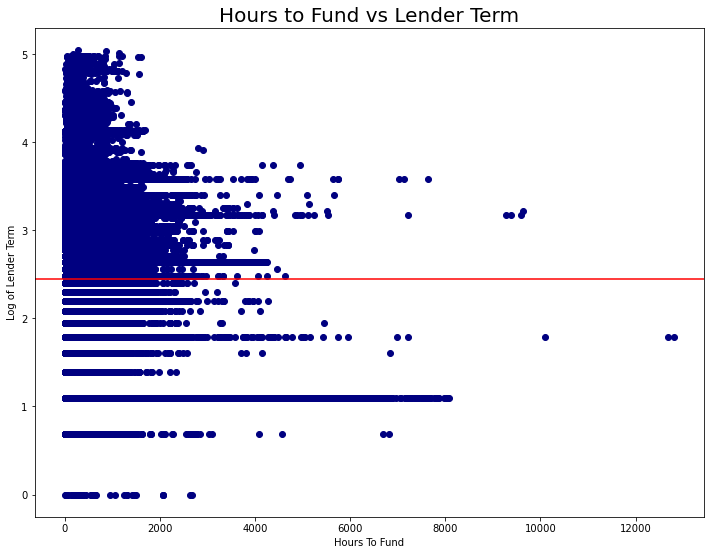

In [101]:
plt.figure(figsize=(12,9))
plt.scatter(x=loans_cleaned['hours_to_fund'], y=np.log(loans_cleaned['lender_term']), 
            color='navy')
plt.axhline(np.mean(np.log(loans_cleaned['lender_term'])), color='red')
plt.title('Hours to Fund vs Lender Term', size=20)
plt.xlabel('Hours To Fund')
plt.ylabel('Log of Lender Term');

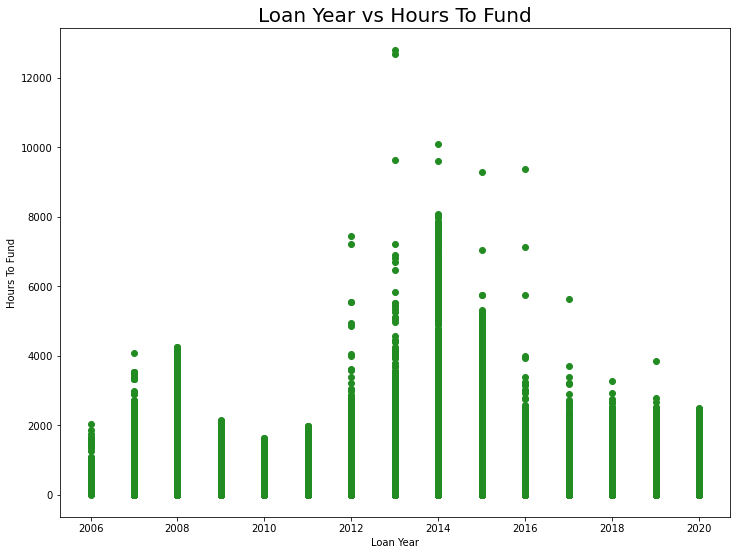

In [104]:
plt.figure(figsize=(12,9))
plt.scatter(x=loans_cleaned['loan_year'], y=loans_cleaned['hours_to_fund'], 
            color='forestgreen')
plt.title('Loan Year vs Hours To Fund', size=20)
plt.xlabel('Loan Year')
plt.ylabel('Hours To Fund');